In [180]:
from rdkit.Chem import MACCSkeys                       #MACCS Keys
from rdkit import Chem, DataStructs
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

def fingerprint_bitgenerator(fps):
    np_fps = []
    
    for fp in fps:
        arr = np.zeros((1,))
        DataStructs.ConvertToNumpyArray(fp,arr)
        np_fps.append(arr)
        
    return np_fps

wdir = '/Users/beomjin_seo/Documents/work_space/kist-europe/QSAR/AOP_data/'
csv = 'final_ic50.csv'

df = pd.read_csv(wdir+csv)
df['Standard Value'].dropna(axis=0)
smi = df['Canonical Smiles']
sd = [Chem.MolFromSmiles(m) for m in smi]

maccfps = [MACCSkeys.GenMACCSKeys(m) for m in sd]

print('Num of available data : ', len(maccfps))

sim = [[ 0 for j in range(len(maccfps))] for i in range(len(maccfps))]
non_duplicated_sim_val = set()
for i in range(len(maccfps)):
    j = i
    for j in range(len(maccfps)):
        sim[i][j] = DataStructs.FingerprintSimilarity(maccfps[i],maccfps[j])
        non_duplicated_sim_val.add(sim[i][j])
    
df_sim = pd.DataFrame(sim)
sim_list = df_sim.values.tolist()


   

Num of available data :  287


In [ ]:
'''

std_val = df['Standard Value']
std_val = df.dropna(axis=0)
std_val = std_val.values.tolist()
std_val_list = [[ 0 for j in range(len(maccfps))] for i in range(len(maccfps))]
for i in range(len(maccfps)):
    #j = i 
    for j in range(len(maccfps)):
        std_val_list[i][j] = abs(std_val[i]-std_val[j])
        
        
#print(type(sim_val),len(sim_val))
#print(type(std_val_list),len(std_val_list))


        
plt.hist2d(sim_list,std_val_list,bins=30)
plt.show()
'''

(array([ 8.,  8., 31., 45., 61., 54., 58., 47., 57., 54., 57., 50., 55.,
        48., 51., 50., 45., 43., 38., 43., 40., 33., 36., 32., 32., 30.,
        30., 23., 23., 13.]),
 array([0.0952381 , 0.12539683, 0.15555556, 0.18571429, 0.21587302,
        0.24603175, 0.27619048, 0.30634921, 0.33650794, 0.36666667,
        0.3968254 , 0.42698413, 0.45714286, 0.48730159, 0.51746032,
        0.54761905, 0.57777778, 0.60793651, 0.63809524, 0.66825397,
        0.6984127 , 0.72857143, 0.75873016, 0.78888889, 0.81904762,
        0.84920635, 0.87936508, 0.90952381, 0.93968254, 0.96984127,
        1.        ]),
 <a list of 30 Patch objects>)

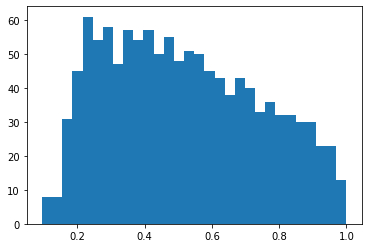

In [181]:
non_duplicated_sim_val = list(non_duplicated_sim_val)
non_duplicated_sim_val.sort()
plt.hist(sim_val,bins=30)

In [182]:
for i in range(len(df_sim)):
    for j in range(len(df_sim)):
        df_sim[i][j] = round(df_sim[i][j],1)

In [185]:
molcule_num = 0
df_sim = df_sim[0:1]
df_sim

,0,1,2,3,4,5,6,7,8,9,...,277,278,279,280,281,282,283,284,285,286
0,1.0,0.8,0.8,0.5,0.8,0.6,0.6,0.6,0.6,0.8,...,0.6,0.6,0.7,0.4,0.4,0.8,0.6,0.6,0.9,0.5


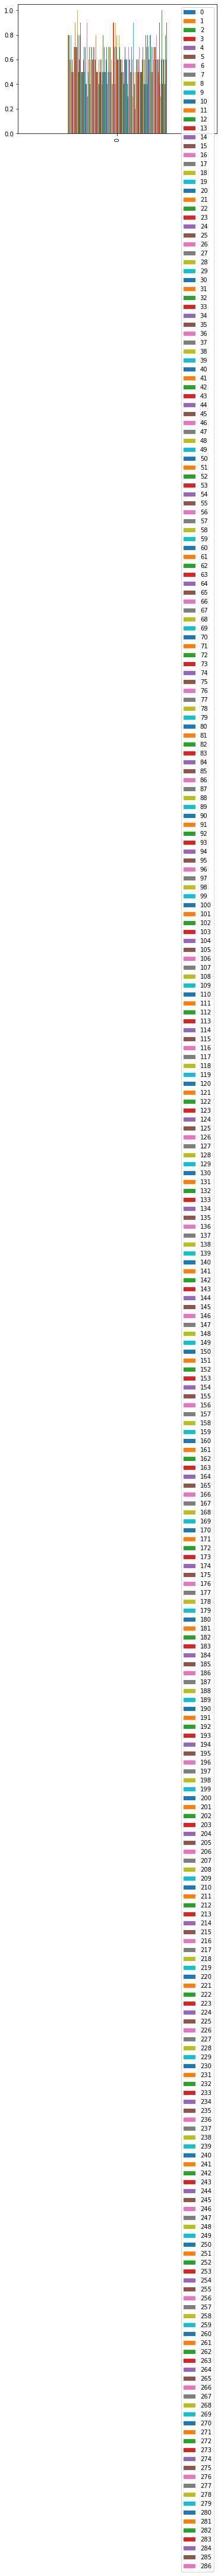

In [189]:
df_sim.plot(kind='bar')

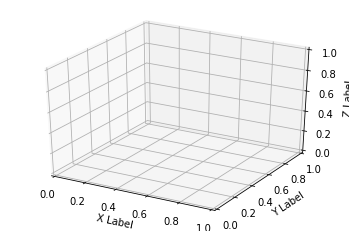

In [96]:
#Axes3D.scatter(xs, ys, zs=0, zdir='z', s=20, c=None, depthshade=True, *args, **kwargs)
from mpl_toolkits.mplot3d import Axes3D

std_val = df['Standard Value']
std_val = df.dropna(axis=0)
std_val = std_val.values.tolist()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(std_val)):
    for c, m, zlow, zhigh in [('r', 'o', 0.0, 0.2), ('b', 'o', 0.2, 0.4),('k', 'o', 0.4, 0.6),('y', 'o', 0.6, 0.8),('b', 'o', 0.8, 1.0)]:
        xs = range(278)
        ys = std_val[i]
        zs = range(278)
        ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()